In [54]:
import io
import itertools
import networkx as nx
import nltk
import os
import numpy as np
import time
import json

import matplotlib.pyplot as plt
# from rake_nltk import Rake
# from nltk.stem.snowball import SnowballStemmer
# from inflection import singularize, pluralize
from nltk.corpus import words, gutenberg, wordnet, reuters, webtext
import inflect
from nltk.corpus import wordnet as wn

In [2]:
with open('sample.txt', 'r') as f:
    text = f.read().lower()

In [3]:
def filter_for_tags(tagged, tags=['NN', 'NNS', 'JJ', 'NNP', 'NNPS']):
    """Apply syntactic filters based on POS tags."""
    return [item[0] for item in tagged if item[1] in tags]

In [4]:
stopwords = nltk.corpus.stopwords.words('english')

In [5]:
sentences = nltk.sent_tokenize(text)

In [6]:
sentences[:5]

[' \npredictive modeling with deep learning is a skill that modern developers need to know.',
 'tensorflow is the premier open-source deep learning framework developed and maintained by google.',
 'although using tensorflow directly can be challenging, the modern tf.keras api beings the simplicity and ease of use of keras to the tensorflow project.',
 'using tf.keras allows you to design, fit, evaluate, and use deep learning models to make predictions in just a few lines of code.',
 'it makes common deep learning tasks, such as classification and regression predictive modeling, accessible to average developers looking to get things done.']

In [7]:
def plot_bar(sorted_arr, scores, n=50):
    labels = []
    width = []
    for kp in sorted_arr[:n]:
        print(kp, scores[kp])
        labels.append(' '.join(kp) if isinstance(kp, tuple) or isinstance(kp, list) else kp)
        width.append(scores[kp])
        
    plt.figure(figsize=(5,10))
    plt.barh(range(len(labels), 0,-1), width=width, tick_label=labels)
    plt.show()

## Corpus

In [8]:
# nltk.download('wordnet')
english_words = list(words.words())
# gutenberg_words = gutenberg.words('austen-emma.txt')
wordnet_words = list(wn.words())

In [9]:
len(english_words)

236736

In [10]:
def is_noun(word):
    synsets = wn.synsets(word, pos='n')
    if len(synsets) == 0:
        return False
    
    for s in synsets:
        syn_word = s.name().split('.')[0]
        if word == syn_word:
            return True
    return False

In [11]:
plural_to_singular = {}

p = inflect.engine()
start = time.time()
for i, word in enumerate(english_words):
    if word not in plural_to_singular.keys() and is_noun(word):
        plural_form = p.plural(word)
        plural_to_singular[plural_form] = word
    if (i+1) % 10000 == 0:
        print(i+1, time.time() - start)

10000 0.21146106719970703
20000 0.47974348068237305
30000 0.7330622673034668
40000 0.9684114456176758
50000 1.2931299209594727
60000 1.502126932144165
70000 1.698601484298706
80000 1.9259932041168213
90000 2.2172152996063232
100000 2.3807802200317383
110000 2.597287178039551
120000 2.793797492980957
130000 2.940952777862549
140000 3.083571195602417
150000 3.2571096420288086
160000 3.392745018005371
170000 3.6809744834899902
180000 3.8784477710723877
190000 4.082184314727783
200000 4.236884593963623
210000 4.405994892120361
220000 4.45941162109375
230000 4.562139511108398


In [57]:
with open('plural_to_singular.json', 'w') as f:
    json.dump(plural_to_singular, f)

In [12]:
# is_noun('thanks')
p.plural('thanks')

'thank'

In [13]:
nltk.download('reuters')
fileids = reuters.fileids()

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\19196\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [14]:
reuters_word_doc_freq = {}
for word in english_words:
    reuters_word_doc_freq[word] = 0

english_words_set = set(english_words)
start = time.time()

for i, fid in enumerate(fileids):
    article = reuters.raw(fileids=[fid]).lower()
    word_tokens = set([])
    for w in nltk.word_tokenize(article):
        if w in english_words_set:
            if w in plural_to_singular.keys():
                word_tokens.add(plural_to_singular[w])
            else:
                word_tokens.add(w)
            
    for word in list(word_tokens):
        reuters_word_doc_freq[word] += 1 / len(fileids)
        
    if (i+1) % 1000 == 0:
        print(i+1, time.time() - start)

1000 0.8377602100372314
2000 1.689985990524292
3000 2.3851263523101807
4000 3.277272939682007
5000 4.076361894607544
6000 4.886272430419922
7000 5.734560966491699
8000 6.533668041229248
9000 7.363065719604492
10000 8.204815149307251


In [15]:
reuters_word_doc_freq['use']

0.02493511308861689

In [16]:
reuters_sorted_words = sorted(reuters_word_doc_freq, key=reuters_word_doc_freq.get,reverse=True)
reuters_common_words = [w for w in reuters_sorted_words if w not in stopwords][:1000]

said 0.6288468668891306
year 0.3166481275491555
net 0.26742677048574465
company 0.2345198368557807
corp 0.23155357804969945
would 0.19670003707824468
last 0.18010752688172765
one 0.16611049314053172
also 0.16564701520208153
share 0.15906562847608874
billion 0.1563774564330776
two 0.15507971820541705
new 0.14831294030404418
stock 0.14608824619948324
note 0.13589173155357892
market 0.13320355951056778
may 0.12986651835372637
march 0.12940304041527617
loss 0.12838338895068574
bank 0.12328513162773384
per 0.11827956989247247
group 0.11281053021876097
told 0.10910270671115996
first 0.10539488320355894
three 0.10187245087133798
trade 0.10187245087133798
today 0.10038932146829757
record 0.10029662588060755
profit 0.09723767148683671
oil 0.0950129773822761
international 0.0942714126807559
price 0.09306637004078556
agreement 0.09288097886540551
exchange 0.09269558769002546
five 0.0888023730070444
could 0.08861698183166435
total 0.0880608083055242
current 0.08527994067482343
nine 0.0852799406748

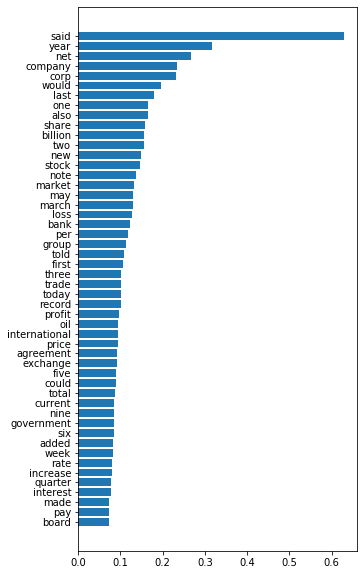

In [17]:
plot_bar(reuters_common_words, reuters_word_doc_freq, n=50)

In [18]:
austen_word_sent_freq = {}
for word in english_words:
    austen_word_sent_freq[word] = 0

english_words_set = set(english_words)
start = time.time()
austen_sentences = nltk.sent_tokenize(gutenberg.raw('austen-persuasion.txt').lower())
print(len(austen_sentences))

for i, s in enumerate(austen_sentences):
    word_tokens = set([])
    for w in nltk.word_tokenize(s):
        if w in english_words_set:
            if w in plural_to_singular.keys():
                word_tokens.add(plural_to_singular[w])
            else:
                word_tokens.add(w)
            
    for word in list(word_tokens):
        austen_word_sent_freq[word] += 1 / len(austen_sentences)
        
    if (i+1) % 1000 == 0:
        print(i+1, time.time() - start)

3653
1000 0.23395729064941406
2000 0.36513686180114746
3000 0.4858427047729492


could 0.11278401313988455
would 0.08787298111141517
captain 0.07254311524774171
lady 0.06186695866411196
one 0.05995072543115273
must 0.05748699698877657
dos 0.054749520941691956
much 0.05420202573227503
little 0.04681084040514657
said 0.04653709280043811
time 0.04407336435806195
good 0.042978373939228105
might 0.042978373939228105
man 0.0416096359156858
think 0.039693402682726565
never 0.03914590747330964
well 0.03832466465918426
sir 0.038050917054475795
nothing 0.036134683821516564
mary 0.03558718861209964
walter 0.03558718861209964
great 0.03394470298384887
know 0.03367095537914041
see 0.033123460169723486
miss 0.032849712565015024
soon 0.0323022173555981
father 0.030933479332055796
though 0.03038598412263888
quite 0.03011223651793042
first 0.029838488913221963
two 0.029838488913221963
always 0.02737476047084584
bath 0.026279770052012007
without 0.026279770052012007
made 0.02573227484259509
every 0.025458527237886632
day 0.024911032028469716
long 0.024637284423761258
however 0.02436

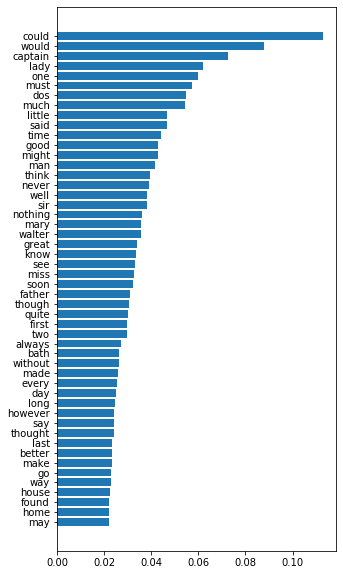

In [19]:
austen_sorted_words = sorted(austen_word_sent_freq, key=austen_word_sent_freq.get,reverse=True)
austen_commmon_words = [w for w in austen_sorted_words if w not in stopwords][:1000]
plot_bar(austen_commmon_words, austen_word_sent_freq, n=50)

In [20]:
common_words = []
for word in austen_commmon_words:
    if word in reuters_common_words:
        common_words.append(word)

In [21]:
'thanks' in common_words

False

In [53]:
with open('common.txt', 'w') as f:
    for word in common_words:
        f.write(word + '\n')

## Words

In [22]:
def get_word_list(sentence):
    word_tokens = []
    for w in nltk.word_tokenize(sentence):
        if len(w) > 1 and w not in stopwords and w not in common_words:
            if w in plural_to_singular.keys():
                word_tokens.append(plural_to_singular[w])
            else:
                word_tokens.append(w)
    tagged = nltk.pos_tag(word_tokens)
    word_list = filter_for_tags(tagged)
    return word_list

In [23]:
unique_word_set = set([])
edges = {}

for s in sentences:
    # tokenize the text using nltk
    word_list = get_word_list(s)
    word_list.sort()

    for word in word_list:
        if word not in unique_word_set:
            unique_word_set.add(word)

    for pair in itertools.combinations(word_list, 2):
        if pair in edges.keys():
            edges[pair] += 1
        else:
            edges[pair] = 1

In [24]:
gr = nx.Graph()  # initialize an undirected graph
gr.add_nodes_from(unique_word_set)

for key, weight in edges.items():
    gr.add_edge(key[0], key[1], weight=weight)

In [25]:
len(gr.nodes)

665

In [26]:
calculated_page_rank = nx.pagerank(gr.to_directed(), weight='weight')

In [27]:
all_keywords = sorted(calculated_page_rank, key=calculated_page_rank.get,reverse=True)

model 0.048912277478165074
layer 0.01918176027813789
datum 0.018033421202222375
example 0.01632888899891592
dataset 0.012346753272252996
deep 0.012010017950529972
function 0.011664308083343955
training 0.010448160302795103
learning 0.009944219689680098
network 0.00952417971917097
image 0.008772335195296785
tutorial 0.00861948609359671
tf.keras 0.008402496989973415
accuracy 0.008398701034353686
input 0.008339191452692416
output 0.008029006776764918
classification 0.007983371957363407
tensorflow 0.0075957242063239
test 0.007002547600369028
keras 0.006726372532787659
mlp 0.006698067361105025
problem 0.00603013708138816
result 0.005658072738340018
class 0.005291631326284649
neural 0.005260781376921215
library 0.005201614948559292
code 0.00518522036951531
fit 0.005040896780581629
validation 0.005003636249229695
prediction 0.00475937702080678
block 0.004681836942224093
api 0.004643925620239973
thanks 0.004239281639760083
list 0.004223747345594084
node 0.004127053673953714
batch 0.00403271038

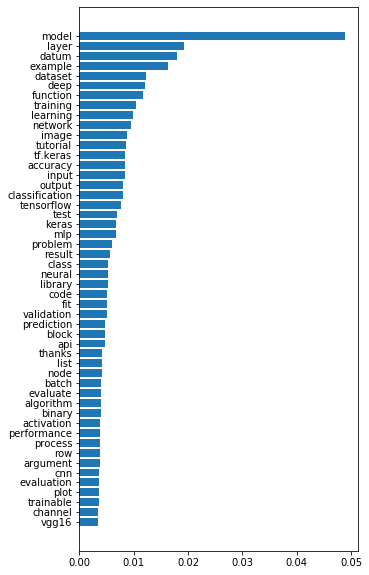

In [28]:
plot_bar(all_keywords, calculated_page_rank, n=50)

In [29]:
np.sum([calculated_page_rank[kp] for kp in all_keywords])

1.0

## Phrases

In [30]:
word_tokens = nltk.word_tokenize(text)
tagged = nltk.pos_tag(word_tokens)
textlist = [x[0] for x in tagged]
keywords = all_keywords[:len(all_keywords)//10]
phrase_freq = {}

In [31]:
def get_phrases(textlist, keywords, k=2):
    # take keyphrases with multiple words into consideration as done in the
    # paper - if two words are adjacent in the text and are selected as
    # keywords, join them together
    modified_key_phrases = set([])
    # keeps track of individual keywords that have been joined to form a keyphrase
    i = k-1
    while i < len(textlist):
        consecutive = tuple(textlist[i-k+1:i+1])
        if all([word in keywords for word in consecutive]):
            modified_key_phrases.add(consecutive)
            if consecutive in phrase_freq.keys():
                phrase_freq[consecutive] += 1
            else:
                phrase_freq[consecutive] = 1
        i += 1
        
    keyword_freq = {}
    for word in textlist:
        if word in keywords:
            if word in keyword_freq.keys():
                keyword_freq[word] += 1
            else:
                keyword_freq[word] = 1
                
    return list(modified_key_phrases), keyword_freq

In [32]:
keyphrases, freq = get_phrases(textlist, keywords, k=2)

In [33]:
keyphrases[:20]

[('code', 'example'),
 ('accuracy', 'evaluation'),
 ('evaluate', 'function'),
 ('learning', 'algorithm'),
 ('image', 'input'),
 ('keras', 'api'),
 ('evaluation', 'process'),
 ('model', 'training'),
 ('mlp', 'network'),
 ('learning', 'project'),
 ('model', 'evaluation'),
 ('regression', 'dataset'),
 ('prediction', 'problem'),
 ('classification', 'problem'),
 ('input', 'layer'),
 ('training', 'epoch'),
 ('validation', 'dataset'),
 ('sigmoid', 'activation'),
 ('test', 'image'),
 ('model', 'api')]

In [34]:
# cooccur_graph = nx.DiGraph()
# cooccur_graph.add_nodes_from([(word,) for word in unique_word_set])

# phrase_dict = {1:unique_word_set}

# for phrase_len in range(2, 5):
#     keyphrases = get_phrases(textlist, all_keywords[:len(all_keywords)//3], phrase_len)
    
#     for length in range(1, phrase_len):
#         for kp in keyphrases:
#             for i in range(length, phrase_len+1):
#                 cooccur_graph.add_edge(kp[i-length:i], kp)

In [35]:
# list(cooccur_graph.successors(('deep',)))

In [36]:
# keywords = all_keywords

# cooccurrence = {}
# freq = {}
# for word in keywords:
#     cooccurrence[word] = 0
#     freq[word] = 0

# phrases = []

# for s in sentences:
#     word_tokens = nltk.word_tokenize(s)
#     for k, g in itertools.groupby(word_tokens, key=lambda x: x in keywords):
#         phrase = tuple(g)
#         if k:
#             for word in phrase:
#                 cooccurrence[word] += len(phrase)
#                 freq[word] += 1
#             phrases.append(phrase)
# #         print(k, phrase)

In [37]:
# freq

In [38]:
# score = {}
# for word in keywords:
#     score[word] = cooccurrence[word] / freq[word]
    
phrase_scores = {}
for p in keyphrases:
#     print(p)
    phrase_scores[p] = np.prod([phrase_freq[p] / freq[w] for w in p])

In [39]:
top_phrases = sorted(phrase_scores, key=phrase_scores.get, reverse=True)

('deep', 'learning') 0.46380308880308885
('binary', 'classification') 0.3681818181818182
('neural', 'network') 0.24060150375939848
('activation', 'function') 0.2293906810035842
('training', 'process') 0.08687943262411348
('classification', 'problem') 0.07102272727272727
('tf.keras', 'api') 0.06363636363636364
('training', 'dataset') 0.05780810919309514
('test', 'dataset') 0.0440251572327044
('classification', 'accuracy') 0.0427807486631016
('output', 'layer') 0.041666666666666664
('validation', 'dataset') 0.0362844702467344
('accuracy', 'evaluation') 0.03361344537815126
('learning', 'algorithm') 0.02857142857142857
('learning', 'library') 0.026785714285714284
('code', 'block') 0.022222222222222223
('standard', 'deep') 0.018018018018018018
('sigmoid', 'activation') 0.015873015873015872
('keras', 'api') 0.015126050420168069
('fit', 'function') 0.014336917562724013


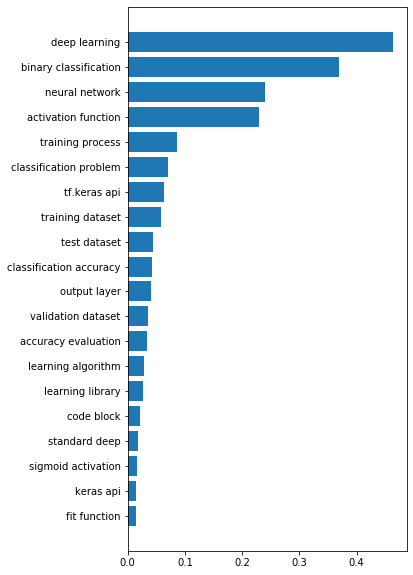

In [40]:
plot_bar(top_phrases, phrase_scores, n=20)

In [41]:
compound_words = []
for p in top_phrases[:50]:
    if all([w in keywords[:2*len(keywords)//3] for w in p]):
        print(' '.join(p), phrase_scores[p])
        compound_words.append(p)

deep learning 0.46380308880308885
binary classification 0.3681818181818182
neural network 0.24060150375939848
activation function 0.2293906810035842
training process 0.08687943262411348
classification problem 0.07102272727272727
tf.keras api 0.06363636363636364
training dataset 0.05780810919309514
test dataset 0.0440251572327044
classification accuracy 0.0427807486631016
output layer 0.041666666666666664
validation dataset 0.0362844702467344
learning algorithm 0.02857142857142857
learning library 0.026785714285714284
code block 0.022222222222222223
keras api 0.015126050420168069
fit function 0.014336917562724013
learning process 0.013392857142857142
image classification 0.012121212121212121
test accuracy 0.011204481792717085
input layer 0.008746355685131194
deep neural 0.007722007722007722
network model 0.006477732793522267
model performance 0.0057692307692307696
mlp binary 0.004761904761904762
prediction problem 0.004464285714285714
evaluate function 0.003584229390681003
classificatio

## Refined TextRank

In [42]:
compound_words

[('deep', 'learning'),
 ('binary', 'classification'),
 ('neural', 'network'),
 ('activation', 'function'),
 ('training', 'process'),
 ('classification', 'problem'),
 ('tf.keras', 'api'),
 ('training', 'dataset'),
 ('test', 'dataset'),
 ('classification', 'accuracy'),
 ('output', 'layer'),
 ('validation', 'dataset'),
 ('learning', 'algorithm'),
 ('learning', 'library'),
 ('code', 'block'),
 ('keras', 'api'),
 ('fit', 'function'),
 ('learning', 'process'),
 ('image', 'classification'),
 ('test', 'accuracy'),
 ('input', 'layer'),
 ('deep', 'neural'),
 ('network', 'model'),
 ('model', 'performance'),
 ('mlp', 'binary'),
 ('prediction', 'problem'),
 ('evaluate', 'function'),
 ('classification', 'dataset'),
 ('mlp', 'model'),
 ('classification', 'prediction'),
 ('image', 'input'),
 ('test', 'image'),
 ('mlp', 'network'),
 ('learning', 'model'),
 ('code', 'example')]

In [43]:
# compound_words = top_phrases[:5]
unique_word_set = set([])
edges = {}

for s in sentences:
    # tokenize the text using nltk
    word_tokens = get_word_list(s)
    
    word_list = []
    i = 0
    while i < len(word_tokens) - 1:
        if (word_tokens[i], word_tokens[i+1]) in compound_words:
            word_list.append(word_tokens[i] + ' ' + word_tokens[i+1])
            i += 2
        else:
            word_list.append(word_tokens[i])
            i += 1
    
    word_list.sort()

    for word in word_list:
        if word not in unique_word_set:
            unique_word_set.add(word)

    for pair in itertools.combinations(word_list, 2):
        if pair in edges.keys():
            edges[pair] += 1
        else:
            edges[pair] = 1

In [44]:
gr = nx.Graph()  # initialize an undirected graph
gr.add_nodes_from(unique_word_set)

for key, weight in edges.items():
    gr.add_edge(key[0], key[1], weight=weight)

In [45]:
len(gr.nodes)

630

In [46]:
calculated_page_rank = nx.pagerank(gr.to_directed(), weight='weight')

In [47]:
all_keywords = sorted(calculated_page_rank, key=calculated_page_rank.get,reverse=True)

model 0.04485098806594288
datum 0.02045280233928666
example 0.017330463155586236
layer 0.015222003630736851
deep learning 0.00981704494936781
tutorial 0.00871448771733955
tf.keras 0.008712300456080999
tensorflow 0.008278319795010177
keras 0.007921814050794338
image 0.007846529002351105
function 0.007583254661827461
accuracy 0.007326492727707451
input 0.006661806604416279
test 0.00598020723473574
result 0.005835123427061817
class 0.005487643669626851
output 0.005329729894528246
block 0.0053164294330950105
problem 0.005309335411302411
training 0.005296206014705055
mlp 0.005248597828891542
fit 0.005141969141389413
list 0.0050862740135117525
training dataset 0.004998982572159342
network 0.004925752870705743
batch 0.004892387165092209
neural network 0.004859311678084522
node 0.004826150082816148
library 0.004648305968576928
argument 0.004356499670013841
api 0.00432893158676334
channel 0.004255484674507118
sigmoid 0.0042302578799741555
validation 0.004183742107041965
row 0.004153312807195342

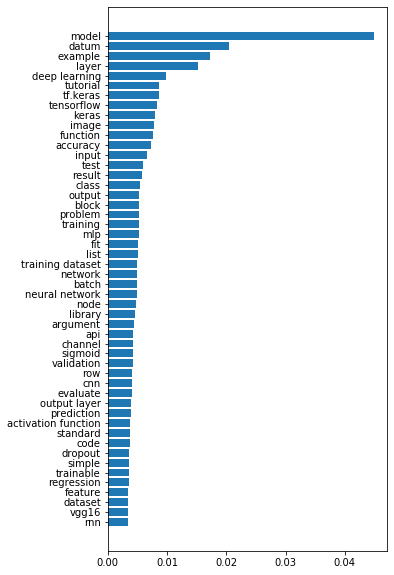

In [48]:
plot_bar(all_keywords, calculated_page_rank)